# **Laboratorijska vježba 4**: Zadaci za samostalni rad

## **Podaci o pacijentima s kardiovaskularnim bolestima**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o pacijentima s kardiovaskularnim bolestima. Skup podataka sadrži sljedeće značajke:

* DEATH_EVENT - je li pacijent preminuo tijekom razdoblja praćenja
* sex - muško(1) ili žensko (0)
* anaemia - smanjenje crvenih krvnih stanica
* smoking
* diabetes - boluje li pacijent od dijabetesa
* high_blood_pressure - boluje li pacijent od hipertenzije
* age - dob pacijenta
* creatinine_phosphokinase - razina CPK enzima u krvi
* ejection_fraction - postotak krvi koji napušta srce u svakoj kontrakciji
* platelets - razina trombocita u krvi 
* serum_creatinine - razina kreatinina u krvi
* serum_sodium - razina serumskog natrija u krvi
* time - trajanje razdoblja praćenja (broj dana u bolnici)


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
data_folder = './Data/'
df = pd.read_csv(data_folder + 'heart_failure_clinical_records_dataset.csv')
df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
107,45.0,1,1876,1,35,0,226000.0,0.9,138,1,0,88,0
129,53.0,1,270,1,35,0,227000.0,3.4,145,1,0,105,0
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
20,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
177,49.0,1,69,0,50,0,132000.0,1.0,140,0,0,147,0
275,45.0,0,582,0,38,1,422000.0,0.8,137,0,0,245,0
43,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33,0
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74,0
62,55.0,0,109,0,35,0,254000.0,1.1,139,1,1,60,0


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## **Zadatak 1: Modeliranje vremena provedenog u bolnici**

Potrebno je provesti regresijsku analizu za modeliranje broja dana provedenih u bolnici, među populacijom pacijenata. Počnimo s uzorkom koji je predstavljen našim skupom podataka. Zanimaju nas dva prediktora: dijabetes i visoki krvni tlak. Koristite ova dva prediktora kako biste modelirali broj dana u bolnici pomoću modela linearne regresije. 


Za početak, neka primjer modela bude:

vrijeme ~ C (dijabetes) + C (visoki krvni tlak).

Pomoću *ols()* funkcije iz biblioteke statsmodels definirajte model i procijenite parametre. 

In [ ]:
# nezavisne varijable - dijabetes i visoki krvni tlak
# zavisna varijabla - broj dana u bolnici

model = smf.ols('time ~ C(diabetes) + C(high_blood_pressure)', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     6.097
Date:                Wed, 12 Apr 2023   Prob (F-statistic):            0.00254
Time:                        08:42:45   Log-Likelihood:                -1718.9
No. Observations:                 299   AIC:                             3444.
Df Residuals:                     296   BIC:                             3455.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Ispišite vrijednosti koeficijenata u modelu, p-vrijednosti F i t statističkih testova i $R_{adjusted}^2$. Komentirajte dobivene vrijednosti.

Interpretirajte dobiveni model prema vrijednostima koeficijenata. Navedite prosječno vrijeme provedeno u bolnici za:

1. Pacijente koji nemaju dijabetes ni visoki krvni tlak.
2. Pacijente koji imaju dijabetes, ali nemaju visoki krvni tlak.
3. Pacijente koji nemaju dijabetes, ali imaju visoki krvni tlak.
4. Pacijente koji imaju i dijabetes i visoki krvni tlak.

In [ ]:
# 1
# Prosječno vrijeme za pacijente koji nemaju dijabetes ni visoki krvni tlak je 139.3851 dana
# 2
# Prosječno vrijeme za pacijente koji imaju dijabetes, ali nemaju visoki krvni tlak je 139.3851 + 4.9059 = 144.291 dana
# 3
# Prosječno vrijeme za pacijente koji nemaju dijabetes, ali imaju visoki krvni tlak je 139.3851 - 31.8228 = 107.5623 dana
# 4
# Prosječno vrijeme za pacijente koji imaju dijabetes i visoki krvni tlak je 139.3851 + 4.9059 - 31.8228 = 112.4682 dana

## **Zadatak 2: Modeliranje vremena provedenog u bolnici (dodavanje interakcijskih članova)**

U prethodnom modelu, moguće je zamijetiti kako osobe s povišenim krvnim tlakom kraće borave u bolnici, iako bi se moglo očekivati suprotno. Jedan od razloga zašto se ozbiljna stanja (poput hipertenzije) mogu povezati s kraćim vremenom provedenim u bolnici jest treći faktor - smrt. Pacijenti koji imaju obziljno stanje mogli bi provesti manje vremena u bolnici jer brzo umiru. Pokušajte steći bolji uvid u dani problem, ubacivanjem smrti kao još jednog prediktora u prethodnom modelu.

In [ ]:
model = smf.ols('time ~ C(diabetes) + C(high_blood_pressure) + C(DEATH_EVENT)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.69
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           6.12e-23
Time:                        08:42:48   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3350.
Df Residuals:                     295   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Procijenite parametre pomoću funkcije *ols()* te interpretirajte dobivene koeficijente i $R_{adjusted}^2$. Opisuje li dobiveni model dani problem bolje od prethodnog modela? Je li smrt statistički značajan prediktor?

In [ ]:
#Možemo primjetiti kako u prethodnom zadatku R2adjusted iznosi 0.033, a u zadatku 2 iznosi 0.296 što znači da ovaj model bolje
#opisuje dani problem nego prethodni model.

#Možemo vidjeti da je smrt statistički značajan prediktor jer mu je P>|t| = 0.0 što znači da značajno utječe na predikciju 
#vremena boravka u bolnici.

Razmislite jesu li smrt i visoki krvni tlak međusobno nezavisne varijable. Na temelju Vašeg zaključka, razmotrite potrebu za ubacivanjem njihovog interakcijskog člana u prethodni model. Procijenite parametre modela te interpretirajte dobivene koeficijente i $R_{adjusted}^2$. Opisuje li dobiveni model dani problem bolje od prethodnog modela?

In [ ]:
#Osobno bih rekao da su povezane, ali možemo vidjeti iz modela da koeficijent iznosi 2.7778 te da P>|t| iznosi 0.868 što 
#bi značilo da statistički nije značajan

In [ ]:
#
model = smf.ols('time ~ C(diabetes) + C(high_blood_pressure) + C(DEATH_EVENT) + C(DEATH_EVENT)*C(high_blood_pressure)', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     31.92
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.32e-22
Time:                        08:42:51   Log-Likelihood:                -1671.0
No. Observations:                 299   AIC:                             3352.
Df Residuals:                     294   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Navedite prosječno vrijeme provedeno u bolnici za:

1. Pacijente koji imaju visoki krvni tlak, a ne umiru tijekom razbolja praćenja.
2. Pacijente koji imaju visoki krvi tlak, a umiru tijekom razdoblja praćenja.

In [ ]:
high_blood_pressure_coef = model.params['C(high_blood_pressure)[T.1]']
death_event_coef = model.params['C(DEATH_EVENT)[T.1]']
interaction_coef = model.params['C(DEATH_EVENT)[T.1]:C(high_blood_pressure)[T.1]']

#Pacijenti koji imaju visoki krvni tlak, a ne umiru tijekom razdoblja praćenja
a = model.params['Intercept'] + high_blood_pressure_coef*1 + death_event_coef*0 + interaction_coef*1*0
#Pacijenti koji imaju visoki krvni tlak, a umiru tijekom praćenja razdoblja
b = model.params['Intercept'] + high_blood_pressure_coef*1 + death_event_coef*1 + interaction_coef*1*1

print(round(a, 2))
print(round(b, 2))

138.69
55.01


## **Zadatak 3. Logaritamske transformacije**

Prisjetite se da logaritamska transformacija izlazne varijable čini model multiplikativnim. Definirajte linearni model za predviđanje vremena provedenog u bolnici, a kao nezavisne varijable upotrijebite visoki krvni tlak, dijabetes i ishod smrti.

In [ ]:
from numpy.linalg import inv, det
df['Reg_intercept'] = 1
X = df[['Reg_intercept','diabetes', 'high_blood_pressure', 'DEATH_EVENT']].to_numpy()
Y = df['time'].to_numpy()
X_t = np.transpose(X)
Beta = np.matmul(np.matmul(inv(np.matmul(X_t, X)), X_t), Y)
Beta

array([164.50891203,   4.83050973, -25.19549195, -85.40053914])

Zatim izvedite logaritamsku transformaciju izlazne varijable na način da kreirate dodatni stupac (*log_time*) u skupu podataka koji sadrži logaritme vrijednosti iz stupca *time*. Ponovno definirajte model regresije kao prethodni, no ovaj puta s novodefiniranim stupcem kao izlaznom varijablom. 

In [ ]:
df['Reg_intercept'] = 1
X = df[['Reg_intercept','diabetes', 'high_blood_pressure', 'DEATH_EVENT']]
Y = df['time']

model = sm.OLS(np.log(Y), X)
results = model.fit()

print(results.params)

Reg_intercept          4.989133
diabetes               0.069860
high_blood_pressure   -0.225933
DEATH_EVENT           -1.107518
dtype: float64


Za varijablu visoki tlak izračunajte koliki je njezin aditivni učinak u prvom modelu te koliki je multiplikativni učinak u drugom modelu na temelju pripadnih koeficijenata. Drugim riječima, kako se mijenja vrijednost izlazne varijable u prvom, odnosno drugom modelu, ako pacijent ima visoki krvni tlak?

In [ ]:
aditivni_ucinak = model.params.loc['high_blood_pressure']
multiplikativni_ucinak = 1 - np.exp(model.params.loc['high_blood_pressure'])

print("Aditivni učinak visokog krvnog tlaka:", aditivni_ucinak)
print("Multiplikativni učinak visokog krvnog tlaka:", multiplikativni_ucinak)

## **Zadatak 4: Logistička regresija: Modeliranje ishoda smrti**

Modelirajte (binarni) ishod smrti na temelju **svih** karakteristika pacijenata. Izuzmite jedino vrijeme provedeno u bolnici jer smo vidjeli kako je ono u velikoj korelaciji sa smrću.

Kao prvi korak, provedite standardizaciju prediktora pomoću z-vrijednosti. To će Vam olakšati tumačenje prediktora koji su vrlo različitih skala. 



In [ ]:
df['sex'] = (df['sex'] - df['sex'].mean()) / df['sex'].std()
df['anaemia'] = (df['anaemia'] - df['anaemia'].mean()) / df['anaemia'].std()
df['smoking'] = (df['smoking'] - df['smoking'].mean()) / df['smoking'].std()
df['diabetes'] = (df['diabetes'] - df['diabetes'].mean()) / df['diabetes'].std()
df['high_blood_pressure'] = (df['high_blood_pressure'] - df['high_blood_pressure'].mean()) / df['high_blood_pressure'].std()
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - df['creatinine_phosphokinase'].mean()) / df['creatinine_phosphokinase'].std()
df['ejection_fraction'] = (df['ejection_fraction'] - df['ejection_fraction'].mean()) / df['ejection_fraction'].std()
df['platelets'] = (df['platelets'] - df['platelets'].mean()) / df['platelets'].std()
df['serum_creatinine'] = (df['serum_creatinine'] - df['serum_creatinine'].mean()) / df['serum_creatinine'].std()
df['serum_sodium'] = (df['serum_sodium'] - df['serum_sodium'].mean()) / df['serum_sodium'].std()

Umjesto linearne, koristite logističku regresiju za modeliranje binarnog ishoda smrti. Napomena: koristite *logit()* funkciju iz biblioteke statsmodels. 

In [ ]:
model = smf.logit(formula='DEATH_EVENT  ~ sex + anaemia + smoking + diabetes + high_blood_pressure + age + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + serum_sodium', data=df)

res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.492108
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.2160
Time:                        08:42:59   Log-Likelihood:                -147.14
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 9.169e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.9879      0.157     -6.310      0.000      -1.295

In [ ]:
# Značajni prediktori smrti: age, creatinine_phosphokinase, ejection_fraction, serum_creatinine
# Neznačajni prediktori smrti: sex, anaemia, smoking, diabetes, high_blood_pressure, platelets, serum_sodium 

Protumačite dobivene koeficijente i $R_{adjusted}^2$. Koji su prediktori statistički značajni za modeliranje smrtnog ishoda? 
Pomoću *errorbar()* funkcije iz biblioteke matplotlib, vizualizirajte učinak svakog prediktora. Vrijednosti koeficijenata i standardne greške možete izvući iz modela regresije (*model.params.values* i *model.bse.values*). 

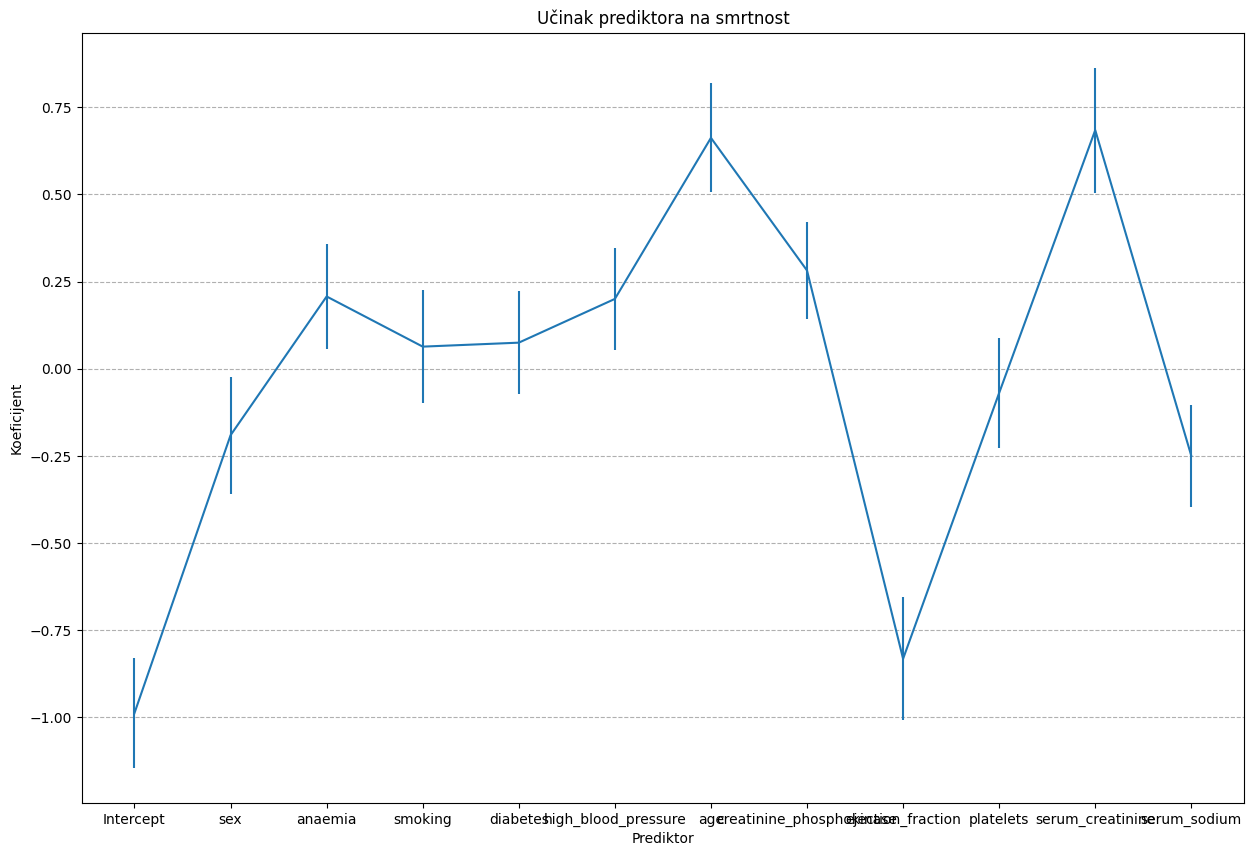

In [ ]:
plt.figure(figsize=(15,10))
plt.errorbar(res.params.index, res.params.values, yerr=res.bse.values)
plt.title("Učinak prediktora na smrtnost")
plt.xlabel("Prediktor")
plt.ylabel("Koeficijent")
plt.grid(axis='y', linestyle='--')
plt.show()

### **Zadatak 4.1. Logistička regresija: Upravljanje prediktorima**

Primijetite da nezavisne varijable (one koje se koriste kao prediktori u regresijskom modelu) često koreliraju. Primjerice, serumski kreatinin važan je pokazatelj zdravlja bubrega. Pomoću modela logističke regresije procijenite učinak serumskog kreatinina na zdravlje pacijenta. Drugim riječima, definirajte model logističke regresije koji kao izlaznu varijablu ima ishod smrti, a kao prediktor razinu kreatinina u krvi. 

In [ ]:
model = smf.logit(formula='DEATH_EVENT  ~ serum_creatinine', data=df)

res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.580689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                 0.07485
Time:                        08:44:12   Log-Likelihood:                -173.63
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.154e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7429      0.131     -5.683      0.000      -0.999      -0.487
serum_creat

Primijetite da je serumski kreatinin u značajnoj korelaciji s godinama. Što je osoba starija, to je razina kreatinina u krvi veća. Imajući ovo na umu, ponovite logističku regresiju sada koristeći serumski kreatinin i dob kao prediktorske varijable. Što očekujete da će se dogoditi s koeficijentom serumskog kreatinina? Hoće li se smanjiti ili povećati? Što se dogodilo s $R^2$ koeficijentom modela?

In [ ]:
df[["serum_creatinine","age"]].corr()

model = smf.logit(formula='DEATH_EVENT  ~ serum_creatinine + age', data=df)

res = model.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.558734
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.1098
Time:                        08:45:10   Log-Likelihood:                -167.06
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.117e-09
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7976      0.136     -5.880      0.000      -1.063      -0.532
serum_creat